In [ ]:
# Author: Jiatong Yang
# Last modified: 04/02/2025

import numpy as np
import matplotlib.pyplot as plt
import scipy

from cycler import cycler
from qutip import (
    Qobj, basis, coherent, create, destroy, expect,
    fock, fock_dm, mesolve, qeye, sigmax, sigmay,
    sigmaz, thermal_dm, tensor, ket2dm
    )


In [2]:
def solve_eigen_states(hamiltonian, N, eigenstates=False):
    """
    Solves the eigenvalue problem for the Hamiltonian matrix with scipy.linalg.
    Returns the first N eigenvalues and eigenvectors.
    """

    # Solve the eigenvalue problem
    eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian)

    # Sort the eigenvalues and eigenvectors
    indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]

    # Return the first N eigenvalues and eigenstates if requested
    if eigenstates:
        return eigenvalues[:N], eigenvectors[:, :N]
    else:
        return eigenvalues[:N]

def transmon_hamilt(M, E_c, E_J, n_g):
    """
    Constructs a Hamiltonian matrix for a transmon qubit with dimension 2M+1 with given parameters
    """
    M = int(M)
    # Create the Hamiltonian matrix with dimension 2M+1
    hamiltonian = np.zeros((2*M+1, 2*M+1))

    # Fill the diagonal with E_c terms
    for i in range(2*M+1):
        hamiltonian[i, i] = 4 * E_c * ((i - M) - n_g) ** 2

    # Fill the off-diagonal elements
    for i in range(2*M):
        hamiltonian[i, i + 1] = -E_J / 2
        hamiltonian[i + 1, i] = -E_J / 2

    return hamiltonian

def SQUID_transmon_hamilt(M, E_c, E_J1, E_J2, n_g, phi_ext):
    """
    Constructs a Hamiltonian matrix for a transmon qubit with dimension 2M+1 with given parameters
    """

    M = int(M)
    # Create the Hamiltonian matrix with dimension 2M+1
    hamiltonian = np.zeros((2*M+1, 2*M+1), dtype=complex)

    # Fill the diagonal with E_c terms
    for i in range(2*M+1):
        hamiltonian[i, i] = 4 * E_c * ((i - M) - n_g) ** 2

    # Fill the off-diagonal elements
    for i in range(2*M):
        hamiltonian[i, i + 1] = -E_J2 / 2 * np.exp(-1j*phi_ext) - E_J1 / 2
        hamiltonian[i + 1, i] = -E_J2 / 2 * np.exp(1j*phi_ext) - E_J1 / 2

    return hamiltonian

def check_conv(N, M_max, hamiltonian, *args):
    """
    Finds the first N energy levels of the transmon Hamiltonian for a given maximum number of iterations M_max.
    Checks for convergence of the energy levels.
    """

    # Initialize the energy levels array
    energy_levels = np.zeros((M_max-N+1, N))

    # Iterate over M_max
    for M in range(N, M_max + 1):
        # Compute the Hamiltonian

        # Solve the eigenvalue problem
        eigenvalues = solve_eigen_states(hamiltonian(M, *args), N, eigenstates=False)

        # Store the first N energy levels
        energy_levels[M - N, :] = eigenvalues[:N]

    # plot the energy levels
    plt.figure()
    plt.plot(range(N, M_max + 1), energy_levels/1e9)
    plt.xlabel('M')
    plt.ylabel('Energy (GHz)')

    return energy_levels


## 1(a) Transmon energy levels

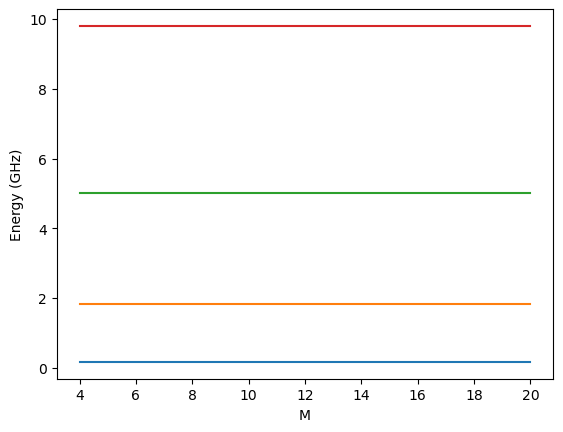

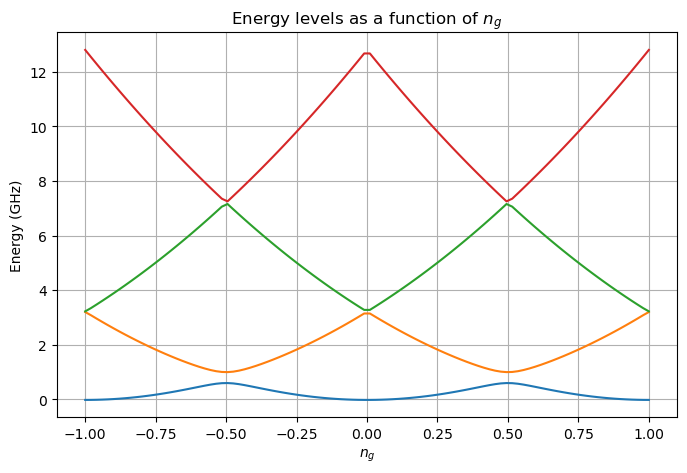

In [47]:
# Transmon Hamiltonian: H = 4E_c(n-n_g)^2 - E_J cos(phi)

n_g = np.linspace(-1, 1, 100)  # Gate charge
N = 4

# 1(a)1: E_c/h = 0.8 GHz, E_J/h = 0.4 GHz

E_c = 0.8e9
E_J = 0.4e9

# Plot convergence of the first N energy levels at n_g = 0.25
M_max = 20
check_conv(N, M_max, transmon_hamilt, E_c, E_J, 0.25)

# Plot the energy levels as a function of n_g with M=10
M = 10
energy_levels_n_g = np.zeros((len(n_g), N))
for i, n in enumerate(n_g):
    energy_levels_n_g[i, :] = solve_eigen_states(transmon_hamilt(M, E_c, E_J, n), N, eigenstates=False)
plt.figure(figsize=(8, 5))
plt.plot(n_g, energy_levels_n_g/1e9)
plt.title(r'Energy levels as a function of $n_g$')
plt.xlabel(r'$n_g$')
plt.ylabel('Energy (GHz)')
plt.grid()

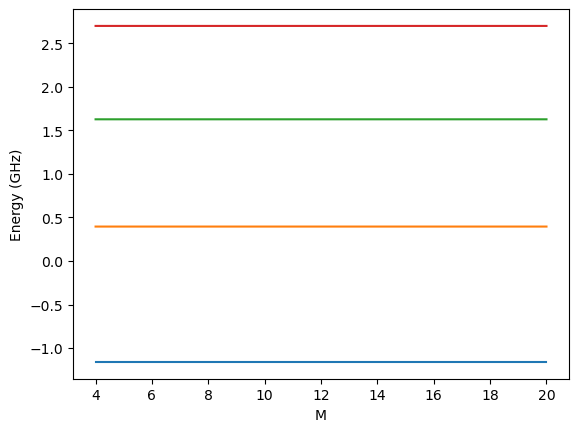

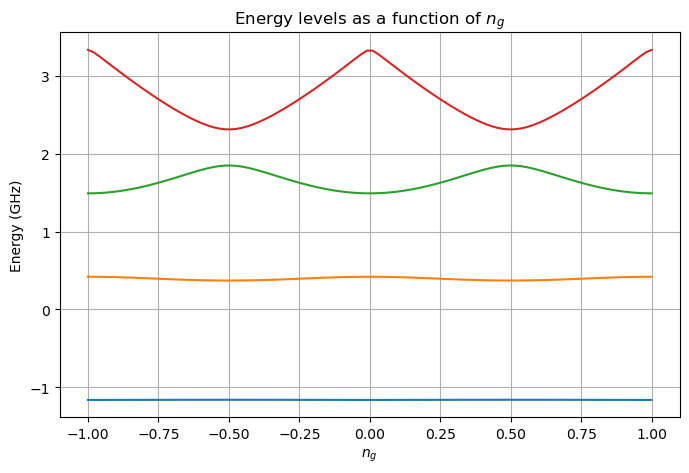

In [49]:
# Transmon Hamiltonian: H = 4E_c(n-n_g)^2 - E_J cos(phi)

n_g = np.linspace(-1, 1, 100)  # Gate charge
N = 4

# 1(a)2: E_c/h = 0.2 GHz, E_J/h = 2 GHz

E_c = 0.2e9
E_J = 2e9

# Plot convergence of the first N energy levels at n_g = 0.25
M_max = 20
check_conv(N, M_max, transmon_hamilt, E_c, E_J, 0.25)

# Plot the energy levels as a function of n_g with M=10
M = 10
energy_levels_n_g = np.zeros((len(n_g), N))
for i, n in enumerate(n_g):
    energy_levels_n_g[i, :] = solve_eigen_states(transmon_hamilt(M, E_c, E_J, n), N, eigenstates=False)
plt.figure(figsize=(8, 5))
plt.plot(n_g, energy_levels_n_g/1e9)
plt.title(r'Energy levels as a function of $n_g$')
plt.xlabel(r'$n_g$')
plt.ylabel('Energy (GHz)')
plt.grid()

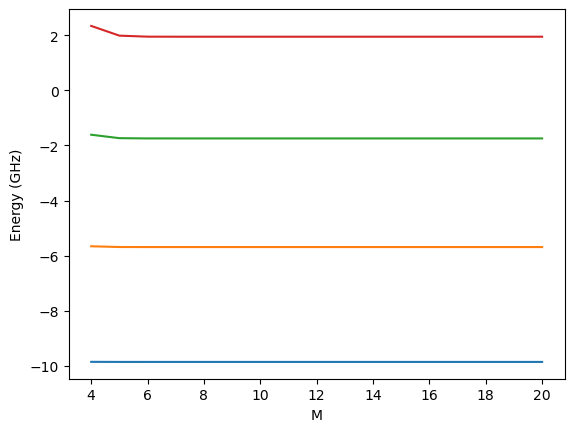

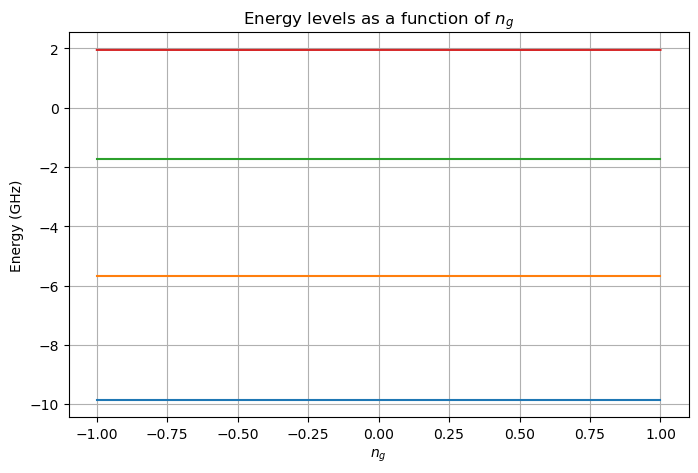

In [50]:
# Transmon Hamiltonian: H = 4E_c(n-n_g)^2 - E_J cos(phi)

n_g = np.linspace(-1, 1, 100)  # Gate charge
N = 4

# 1(a)3: E_c/h = 0.2 GHz, E_J/h = 12 GHz

E_c = 0.2e9
E_J = 12e9

# Plot convergence of the first N energy levels at n_g = 0.25
M_max = 20
check_conv(N, M_max, transmon_hamilt, E_c, E_J, 0.25)

# Plot the energy levels as a function of n_g with M=10
M = 10
energy_levels_n_g = np.zeros((len(n_g), N))
for i, n in enumerate(n_g):
    energy_levels_n_g[i, :] = solve_eigen_states(transmon_hamilt(M, E_c, E_J, n), N, eigenstates=False)
plt.figure(figsize=(8, 5))
plt.plot(n_g, energy_levels_n_g/1e9)
plt.title(r'Energy levels as a function of $n_g$')
plt.xlabel(r'$n_g$')
plt.ylabel('Energy (GHz)')
plt.grid()

## 1(b) SQUID transmon energy levels

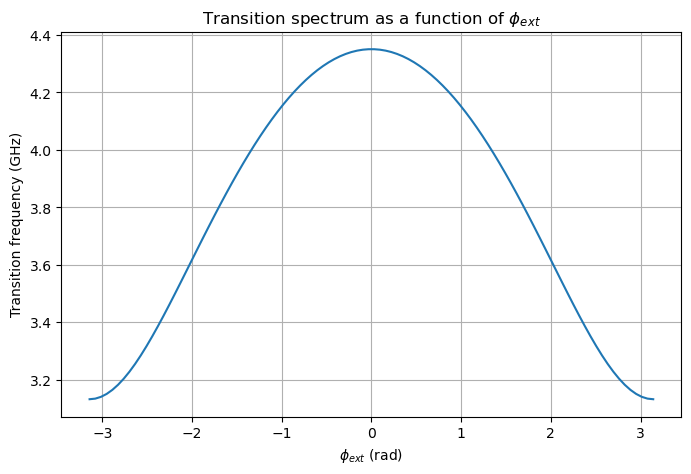

In [54]:
E_J1 = 10e9
E_J2 = 3e9
E_c = 0.2e9
n_g = 0
phi_ext = np.linspace(-np.pi, np.pi, 100)  # External flux

# Plot the transition spectrum (E1-E0) as a function of phi_ext
M = 10
energy_levels_phi_ext = np.zeros((len(phi_ext), 2))
for i, phi in enumerate(phi_ext):
    energy_levels_phi_ext[i, :] = solve_eigen_states(SQUID_transmon_hamilt(M, E_c, E_J1, E_J2, n_g, phi), 2, eigenstates=False)

plt.figure(figsize=(8, 5))
plt.plot(phi_ext, (energy_levels_phi_ext[:, 1] - energy_levels_phi_ext[:, 0])/1e9)
plt.title(r'Transition spectrum as a function of $\phi_{ext}$')
plt.xlabel(r'$\phi_{ext}$ (rad)')
plt.ylabel('Transition frequency (GHz)')
plt.grid()


## 2(e) Effective two-qubit coupling strength

omega_c where g_ab_new = 0: 6.03 GHz


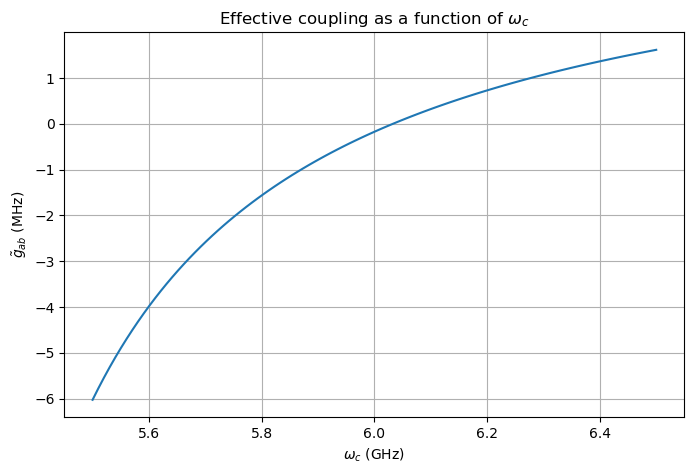

In [7]:
# All units in MHz

g_a = 70
g_b = 70
g_ab = 5
omega_a = 5e3
omega_b = 5.1e3
omega_c = np.linspace(5.5, 6.5, 100)*1e3

g_ab_new = g_ab + 1/2 * g_a * g_b *(1/(omega_a - omega_c) + 1/(omega_b - omega_c))
plt.figure(figsize=(8, 5))
plt.plot(omega_c/1e3, g_ab_new)
plt.title(r'Effective coupling as a function of $\omega_c$')
plt.xlabel(r'$\omega_c$ (GHz)')
plt.ylabel(r'$\tilde{g}_{ab}$ (MHz)')
plt.grid()

# Solve for the omega_c such that g_ab_new = 0 using scipy.fsolve
omega_c_zero = scipy.optimize.fsolve(lambda x: g_ab + 1/2 * g_a * g_b *(1/(omega_a - x) + 1/(omega_b - x)), omega_c[0])
print(f"omega_c where g_ab_new = 0: {omega_c_zero[0]/1e3:.2f} GHz")

## 3(c) Time-dependent populations of groud and excited states

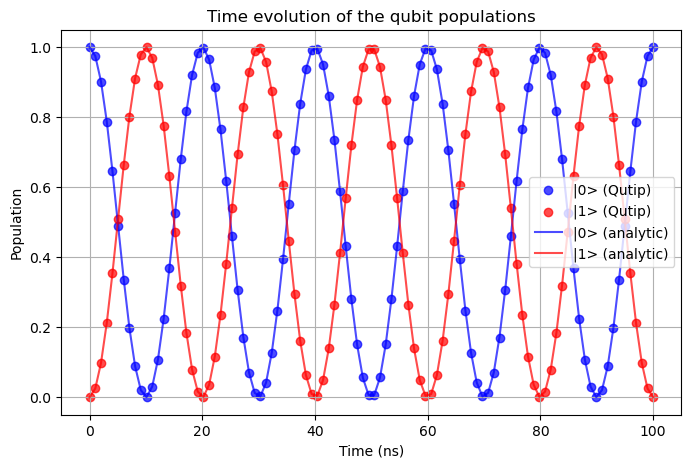

In [ ]:
# Use qutip to time evolve the initial state over time list t and find the ground and excited state populations

Omega = 50e6 * 2 * np.pi # Rabi frequency in Hz
w_q = 4e9 * 2 * np.pi # qubit frequency in Hz
tlist = np.linspace(0, 100, 100)*1e-9 # time list in seconds
hbar = 1 # Planck's constant in J*s


H_0 = - hbar * w_q / 2 * sigmaz()
H_d = hbar * Omega * sigmax()  # Drive Hamiltonian
H_eff = [H_0, [H_d, "cos(wd*t)"]] 
args = {"wd": w_q}  # drive resonantly on omega_q


psi_g = basis(2, 0)  # ground state of the qubit (|0>)
psi_e = basis(2, 1)  # excited state of the qubit (|1>)
result = mesolve(H_eff, psi_g, tlist, [], [ket2dm(psi_g), ket2dm(psi_e)], args=args)

# Plot the populations of the ground and excited states
plt.figure(figsize=(8, 5))

# Plot the Qutip results
plt.scatter(tlist*1e9, result.expect[0], label='|0> (Qutip)', color='blue', alpha=0.7)  # ground state population
plt.scatter(tlist*1e9, result.expect[1], label='|1> (Qutip)', color='red', alpha=0.7)

# Plot the analytic results
plt.plot(tlist*1e9, (np.cos(Omega*tlist/2))**2, label='|0> (analytic)', color='blue', linestyle='-', alpha=0.7)
plt.plot(tlist*1e9, (np.sin(Omega*tlist/2))**2, label='|1> (analytic)', color='red', linestyle='-', alpha=0.7)
plt.title('Time evolution of the qubit populations')
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.grid()

## 3(d) Time-dependent populations of groud and excited states (breakdown of RWA)

/Users/jiatongyang/opt/anaconda3/envs/qutip-env/lib/python3.13/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


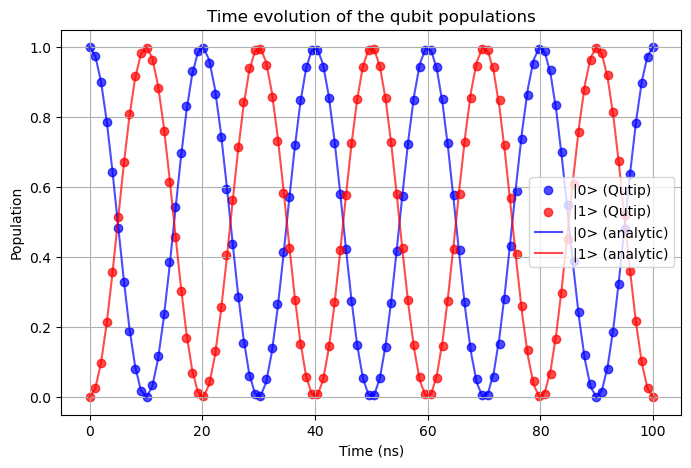

In [ ]:
# Use qutip to time evolve the initial state over time list t and find the ground and excited state populations

Omega = 50e6 * 2 * np.pi # Rabi frequency in Hz
w_q = 500e6 * 2 * np.pi # qubit frequency in Hz
tlist = np.linspace(0, 100, 100)*1e-9 # time list in seconds
hbar = 1 # Planck's constant in J*s


H_0 = - hbar * w_q / 2 * sigmaz()
H_d = hbar * Omega * sigmax()  # Drive Hamiltonian
H_eff = [H_0, [H_d, "cos(wd*t)"]]  
args = {"wd": w_q}  # drive resonantly on omega_q


psi_g = basis(2, 0)  # ground state of the qubit (|0>)
psi_e = basis(2, 1)  # excited state of the qubit (|1>)
result = mesolve(H_eff, psi_g, tlist, [], [ket2dm(psi_g), ket2dm(psi_e)], args=args)

# Plot the populations of the ground and excited states
plt.figure(figsize=(8, 5))

# Plot the Qutip results
plt.scatter(tlist*1e9, result.expect[0], label='|0> (Qutip)', color='blue', alpha=0.7)  # ground state population
plt.scatter(tlist*1e9, result.expect[1], label='|1> (Qutip)', color='red', alpha=0.7)

# Plot the analytic results
plt.plot(tlist*1e9, (np.cos(Omega*tlist/2))**2, label='|0> (analytic)', color='blue', linestyle='-', alpha=0.7)
plt.plot(tlist*1e9, (np.sin(Omega*tlist/2))**2, label='|1> (analytic)', color='red', linestyle='-', alpha=0.7)
plt.title('Time evolution of the qubit populations')
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.grid()

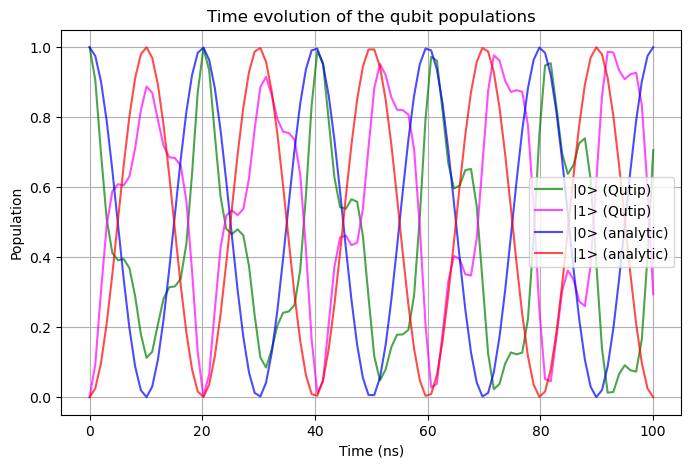

In [ ]:
# Use qutip to time evolve the initial state over time list t and find the ground and excited state populations

Omega = 50e6 * 2 * np.pi # Rabi frequency in Hz
w_q = 50e6 * 2 * np.pi # qubit frequency in Hz
tlist = np.linspace(0, 100, 100)*1e-9 # time list in seconds
hbar = 1 # Planck's constant in J*s


H_0 = - hbar * w_q / 2 * sigmaz()
H_d = hbar * Omega * sigmax()  # Drive Hamiltonian
H_eff = [H_0, [H_d, "cos(wd*t)"]]  
args = {"wd": w_q}  # drive resonantly on omega_q


psi_g = basis(2, 0)  # ground state of the qubit (|0>)
psi_e = basis(2, 1)  # excited state of the qubit (|1>)
result = mesolve(H_eff, psi_g, tlist, [], [ket2dm(psi_g), ket2dm(psi_e)], args=args)

# Plot the populations of the ground and excited states
plt.figure(figsize=(8, 5))

# Plot the Qutip results
plt.plot(tlist*1e9, result.expect[0], label='|0> (Qutip)', color='green', alpha=0.7)  # ground state population
plt.plot(tlist*1e9, result.expect[1], label='|1> (Qutip)', color='magenta', alpha=0.7)

# Plot the analytic results
plt.plot(tlist*1e9, (np.cos(Omega*tlist/2))**2, label='|0> (analytic)', color='blue', linestyle='-', alpha=0.7)
plt.plot(tlist*1e9, (np.sin(Omega*tlist/2))**2, label='|1> (analytic)', color='red', linestyle='-', alpha=0.7)
plt.title('Time evolution of the qubit populations')
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.grid()

## 3(e) Include decay

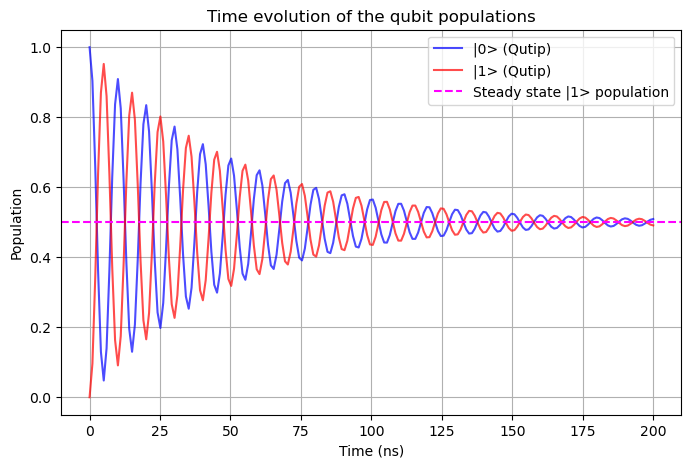

In [ ]:
g = 1/50e-9 # T1 = 50 ns
c_ops = [np.sqrt(g) * sigmaz()] # collapse operator

Omega = 100e6 * 2 * np.pi # Rabi frequency in Hz
w_q = 5e9 * 2 * np.pi # qubit frequency in Hz
tlist = np.linspace(0, 200, 200)*1e-9 # time list in seconds
hbar = 1 # Planck's constant in J*s

H_0 = - hbar * w_q / 2 * sigmaz()
H_d = hbar * Omega * sigmax()  # Drive Hamiltonian
H_eff = [H_0, [H_d, "cos(wd*t)"]]  
args = {"wd": w_q}  # drive resonantly on omega_q

psi_g = basis(2, 0)  # ground state of the qubit (|0>)
psi_e = basis(2, 1)  # excited state of the qubit (|1>)
result = mesolve(H_eff, psi_g, tlist, c_ops, [ket2dm(psi_g), ket2dm(psi_e)], args=args)

steady_state = Omega**2/4 * 1/(Omega**2/2 + g**2/4) # Steady state population of |1> in the presence of decay

# Plot the populations of the ground and excited states
plt.figure(figsize=(8, 5))

# Plot the Qutip results
plt.plot(tlist*1e9, result.expect[0], label='|0> (Qutip)', color='blue', alpha=0.7)  # ground state population
plt.plot(tlist*1e9, result.expect[1], label='|1> (Qutip)', color='red', alpha=0.7)
plt.axhline(steady_state, color='magenta', linestyle='--', label='Steady state |1> population') # Steady state limit
plt.title('Time evolution of the qubit populations')
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.grid()

## 4(e) Raman transitions

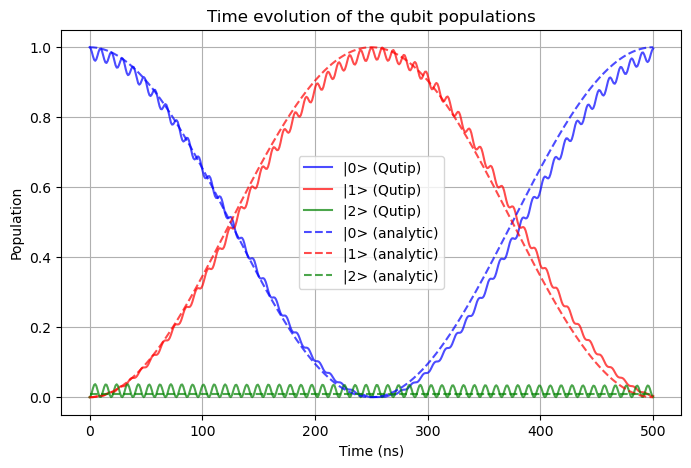

In [ ]:
w_1 = 2*np.pi*1e9
w_2 = 2*np.pi*5e9
Delta_a = 2*np.pi*100e6
Delta_b = 2*np.pi*100e6
w_a = w_2 - Delta_a
w_b = w_2 - w_1 - Delta_b
Omega_a = 2*np.pi*20e6
Omega_b = 2*np.pi*20e6
tlist = np.linspace(0,500, 500)*1e-9 # time list in seconds

psi_0 = basis(3,0)  # ground state of the qubit (|0>)
psi_1 = basis(3,1)  # excited state of the qubit (|1>)
psi_2 = basis(3,2)  # excited state of the qubit (|2>)
H0 = w_1 * ket2dm(psi_1) + w_2 * ket2dm(psi_2)  # Hamiltonian for the two qubits

H_a = Omega_a * (psi_0 * psi_2.dag() + psi_2 * psi_0.dag())  # Drive Hamiltonian a
H_b = Omega_b * (psi_1 * psi_2.dag() + psi_2 * psi_1.dag())  # Drive Hamiltonian b
H = [H0, [H_a, "cos(wa*t)"], [H_b, "cos(wb*t)"]]  
args = {"wa": w_a, "wb": w_b}

result = mesolve(H, psi_0, tlist, [], [ket2dm(psi_0), ket2dm(psi_1), ket2dm(psi_2)], args=args)

# Plot the populations of the 3 states

plt.figure(figsize=(8, 5))

# Plot the Qutip results
plt.plot(tlist*1e9, result.expect[0], label='|0> (Qutip)', color='blue', alpha=0.7)  # ground state population
plt.plot(tlist*1e9, result.expect[1], label='|1> (Qutip)', color='red', alpha=0.7)  # excited state population
plt.plot(tlist*1e9, result.expect[2], label='|2> (Qutip)', color='green', alpha=0.7)  # excited state population

c0 = (np.cos(Omega_a**2/(4*Delta_a)*tlist))**2
c1 = (np.sin(Omega_a**2/(4*Delta_a)*tlist))**2
c2 = (Omega_a/(2*Delta_a) *(c0 + c1))**2

plt.plot(tlist*1e9, c0, label='|0> (analytic)', color='blue', linestyle='--', alpha=0.7)
plt.plot(tlist*1e9, c1, label='|1> (analytic)', color='red', linestyle='--', alpha=0.7)
plt.plot(tlist*1e9, c2, label='|2> (analytic)', color='green', linestyle='--', alpha=0.7)


plt.title('Time evolution of the qubit populations')
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.grid()